### Task-7 Stock price prediction using numerical and textual analysis
#### Zainab Waseem Qazi
#### Data Science and Business Analytics intern @TSF

## Numerical Data Analysis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
import joblib

%matplotlib inline

<ipython-input-1-bc2d852e4426>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df = pd.read_csv("historical_data.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0
1,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0
2,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0
3,2005-07-05,7275.000000,7308.720215,7209.859863,7220.250000,7220.250000,12600.0
4,2005-07-06,7227.220215,7296.180176,7227.220215,7287.600098,7287.600098,13400.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3695,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200.0
3696,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
3697,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
3698,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
3699,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0


In [5]:
type(df['Date'][0])

str

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0
1,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0
2,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0
3,2005-07-05,7275.000000,7308.720215,7209.859863,7220.250000,7220.250000,12600.0
4,2005-07-06,7227.220215,7296.180176,7227.220215,7287.600098,7287.600098,13400.0


In [8]:
df.set_index('Date',inplace=True,drop=False)

In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2005-06-30,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0
2005-07-01,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0
2005-07-04,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0
2005-07-05,2005-07-05,7275.000000,7308.720215,7209.859863,7220.250000,7220.250000,12600.0
2005-07-06,2005-07-06,7227.220215,7296.180176,7227.220215,7287.600098,7287.600098,13400.0


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03
mean,22217.613841,22349.805309,22041.222145,22191.865366,22191.865366,1.035519e+05
std,8802.918993,8814.874438,8763.852817,8784.033920,8784.033920,1.234281e+06
min,7154.270020,7218.279785,7123.109863,7145.129883,7145.129883,8.000000e+02
25%,16042.179688,16214.007813,15867.542481,16035.654785,16035.654785,1.060000e+04
50%,19592.879883,19718.844727,19448.019532,19590.979493,19590.979493,1.440000e+04
75%,28270.249512,28395.725098,28098.396973,28229.640625,28229.640625,2.040000e+04
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,3.181510e+07


### Using ARIMA Data Analysis

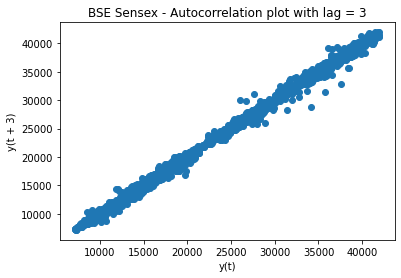

In [12]:
## Checking for Cross-correlation

plt.figure()
lag_plot(df['Close'], lag=3)
plt.title('BSE Sensex - Autocorrelation plot with lag = 3')
plt.show()

### Visualize Plot

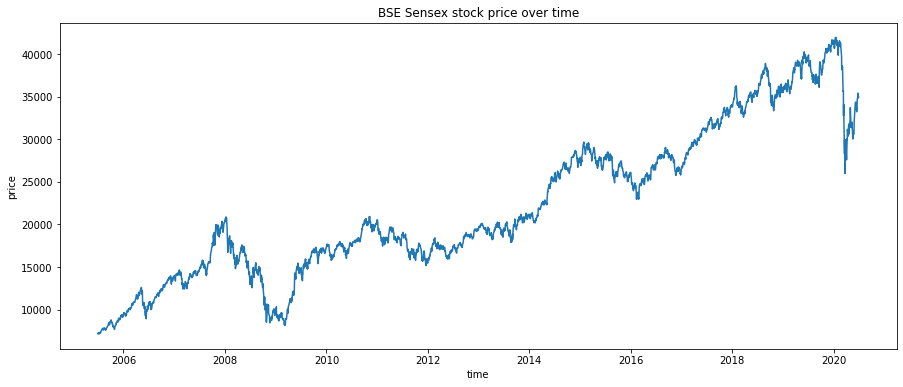

In [13]:
plt.figure(figsize=(15,6))
plt.plot(df["Close"])
plt.title("BSE Sensex stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

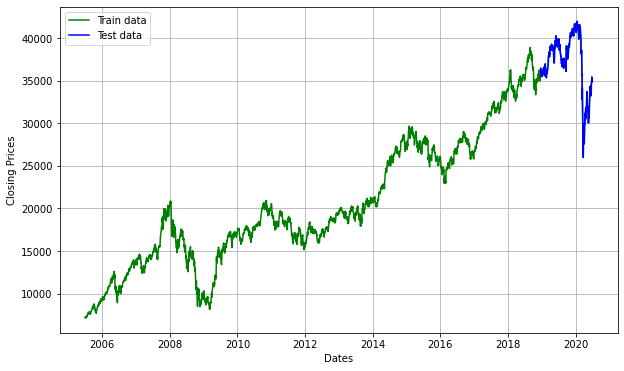

In [14]:
#split data into train and training set

train_data, test_data = df[:int(len(df)*0.9)], df[int(len(df)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df['Close'], 'green', label='Train data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.legend()

In [15]:
# The auto_arima function seeks to identify the 
# most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. 

model_autoARIMA = auto_arima(train_data['Close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45538.079, Time=0.76 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=45520.656, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45520.197, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=45540.646, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=45522.080, Time=0.65 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=45521.980, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=45523.932, Time=0.71 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=45522.119, Time=0.23 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.526 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3304
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -22757.099
Date:                Wed, 21 Dec 2022   AIC                          45520.197
Time:                       

In [16]:
# Fitting the ARIMA model

model = ARIMA(train_data['Close'], order=(0,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
# Forecast

fc, se, conf = fitted.forecast(368, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data['Close'], label='training')
plt.plot(test_data['Close'], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('BSE Sensex Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(test_data['Close'], fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Close'], fc)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(test_data['Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data['Close'])/np.abs(test_data['Close']))
print('MAPE: '+str(mape))

#### Around 7.6% MAPE(Mean Absolute Percentage Error) implies the model is about 92.4% accurate in predicting the test set observations.

## Using LSTM Analysis

In [ ]:
stock1 = df["Close"].copy()
stock1 = pd.DataFrame(stock1)

In [ ]:
stock1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(stock1)

In [ ]:
df1.shape

In [ ]:
## Train test split

train_size = int(len(df1)*0.9)
test_size = len(df1) - train_size
initial_train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [ ]:
train_size,test_size

In [ ]:
## Validation Data

train_data,cv_data = initial_train_data[0:int(len(initial_train_data)*0.8)],initial_train_data[int(len(initial_train_data)*0.8):]

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 60
Xtrain, ytrain = create_dataset(train_data, time_step)
Xtest, ytest = create_dataset(test_data, time_step)
Xcv,ycv = create_dataset(cv_data, time_step)

In [ ]:
print(Xtrain.shape), print(ytrain.shape)

In [ ]:
print(Xtest.shape), print(ytest.shape)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
Xtrain =Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1] , 1)
Xtest = Xtest.reshape(Xtest.shape[0],Xtest.shape[1] , 1)
Xcv = Xcv.reshape(Xcv.shape[0],Xcv.shape[1] , 1)

In [ ]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [ ]:
#Defining our metric
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
## LSTM Model Initialization
model = Sequential()
model.add(LSTM(units=128, activation='tanh', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=26), input_shape = (Xtrain.shape[1], 1), unroll = True))
model.add(Dense(1, name="output_layer"))
model.compile(optimizer = Adam(learning_rate=0.001), loss = root_mean_squared_error)

In [ ]:
model.summary()

In [ ]:
model.fit(Xtrain,ytrain,validation_data=(Xcv,ycv),epochs=100,batch_size=16,verbose=1)

In [ ]:
### Prediction and check performance metrics
train_predict=model.predict(Xtrain)
test_predict=model.predict(Xtest)

In [ ]:
### Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
rescaled_ytrain = scaler.inverse_transform(ytrain.reshape(-1, 1))
rescaled_ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(rescaled_ytrain,train_predict))

In [ ]:
# report performance
mse = mean_squared_error(rescaled_ytest,test_predict)
print('MSE: '+str(mse))
mae = mean_absolute_error(rescaled_ytest,test_predict)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(rescaled_ytest,test_predict))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_predict - rescaled_ytest)/np.abs(rescaled_ytest))
print('MAPE: '+str(mape))

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(df1[3363:,]),color='red', label='Actual Price')
plt.plot(test_predict, color='blue', linestyle='dashed',label='Predicted Price')
plt.title('Prices Prediction - LSTM Model')
plt.ylabel('Prices')
plt.legend()
plt.show()

#### It seems that there has been a great fall in stock market price in the time period of March 2020 - May 2020.

# Text Data Analysis

In [ ]:
from datetime import datetime
import string
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

In [ ]:
text = pd.read_csv("india-news-headlines.csv")

In [ ]:
text.shape

In [ ]:
text.head()

In [ ]:
text.tail()

In [ ]:
text['publish_date'] = pd.to_datetime(text['publish_date'],format='%Y%m%d')

### Since, we only have the the numerical data between 30-06-2005 to 29-06-2020, we will only use the text data generated during these dates

In [ ]:
text1 = text[text['publish_date']> '2005-06-29'].reset_index(drop=True)

In [ ]:
text1.shape

### Since, we are doing a stock price prediction, we only need data related to business

In [ ]:
headline_cats = [cat for cat in text1['headline_category'].value_counts().index if 'business' in cat]

In [ ]:
headline_cats

In [ ]:
text1 = text1.loc[text1['headline_category'].str.find('business') !=-1].reset_index(drop=True)

In [ ]:
text1.head()

### Joining the rows of the same date

In [ ]:
text2 = text1.groupby('publish_date').agg({'headline_category':'first','headline_text': '. '.join}).reset_index()

In [ ]:
text2.head()

In [ ]:
text2.shape

In [ ]:
text2['headline_text'] = text2['headline_text'].str.lower()

In [ ]:
count = 0
for text in text2['headline_text']:
    if 'bse' in text or 'sensex' in text :
        count+=1

In [ ]:
count

In [ ]:
from nltk import sent_tokenize

def actual_news(data):
    for index in data.index:
        sentences = sent_tokenize(data['headline_text'][index])
        relevant_line = ' '.join(sent for sent in sentences if 'sensex' in sent or 'bse' in sent)
        if len(relevant_line)>5:
            data['headline_text'][index] =relevant_line
    return data

In [ ]:
text3 = actual_news(text2)

In [ ]:
text3.head()

In [ ]:
# Cleaning the text
from nltk import word_tokenize

def clean_txt(text):
    # Removing non alphanumeric text
    text = re.sub('[^a-zA-Z]',' ',text)
    return text

In [ ]:
text1['headline_text'] = text1['headline_text'].apply(clean_txt)
text3['headline_text'] = text3['headline_text'].apply(clean_txt)

In [ ]:
headlines = list(text1['headline_text'])

In [ ]:
# Sentiment Analysis

score=[]
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# Stock Market Lexicon to update the sentiment analyzer to analyze business news
import csv

stock_lex = pd.read_csv('lexicon_data/stock_lex.csv')
stock_lex['sentiment'] = (stock_lex['Aff_Score'] + stock_lex['Neg_Score'])/2
stock_lex = dict(zip(stock_lex.Item, stock_lex.sentiment))
stock_lex = {k:v for k,v in stock_lex.items() if len(k.split(' '))==1}
stock_lex_scaled = {}
for k, v in stock_lex.items():
    if v > 0:
        stock_lex_scaled[k] = v / max(stock_lex.values()) * 4
    else:
        stock_lex_scaled[k] = v / min(stock_lex.values()) * -4

# Loughran and McDonald
positive = []
with open('lexicon_data/lm_positive.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        positive.append(row[0].strip())
    
negative = []
with open('lexicon_data/lm_negative.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        entry = row[0].strip().split(" ")
        if len(entry) > 1:
            negative.extend(entry)
        else:
            negative.append(entry[0])

final_lex = {}
final_lex.update({word:2.0 for word in positive})
final_lex.update({word:-2.0 for word in negative})
final_lex.update(stock_lex_scaled)
final_lex.update(sid.lexicon)
sid.lexicon = final_lex

In [ ]:
# Calculating the sentiment of each headline

scores = []

for sentence in headlines:
    scores.append(sid.polarity_scores(sentence)['compound'])

In [ ]:
len(scores)

#### We will create a classification model to identify whether the news is positive or not

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initializing the word vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,3),lowercase=False)
# vectorizer = joblib.load('TF-IDF Vectorizer')

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(headlines[int(len(headlines)/2):],scores[int(len(headlines)/2):],test_size=0.25,random_state=21)

In [ ]:
Xtrain = vectorizer.fit_transform(Xtrain)
Xtest = vectorizer.transform(Xtest)

# Xtrain = vectorizer.transform(Xtrain)
# Xtest = vectorizer.transform(Xtest)

### SVM Classifier

In [ ]:
from sklearn import svm

# model = svm.SVC(C=100,kernel='rbf',gamma=0.01)
model = joblib.load('SVM_classifier_text')
# model.fit(Xtrain, ytrain) 

In [ ]:
predictions = model.predict(Xtest)
matrix = confusion_matrix(ytest,predictions)
print(matrix)

In [ ]:
from collections import Counter

print(Counter(scores).keys())
print(Counter(scores).values())

#### Let's focus on the keywords which have been used.

In [ ]:
target_news = text3.loc[text3['publish_date']>'2019-06-29']
target_news1 = text2.loc[text2['publish_date']>'2019-06-29']

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)

news_tokens = ''
news_tokens1 = ''
for index in target_news.index:
        news_tokens = news_tokens + '. ' + target_news['headline_text'][index]
        
for index in target_news1.index:
        news_tokens1 = news_tokens1 + '. ' + target_news1['headline_text'][index]

In [ ]:
# Making a WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(news_tokens)

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(news_tokens1)

In [ ]:
## Before extracting the BSE Sensex related texts

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
## After extracting the BSE Sensex related texts

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Observation: We can see the top words used in the news data. 
### Also, if compare the texts before extracting Sensex related news, there  isn't much clarity on the important words whereas extracting Sensex related news in a much more clear view of the keywords used.

### Hybrid Model

#### We will add the sentiment of the texts to the original LSTM and see if there is an imporvement in the performance

In [ ]:
## Now let's join the text data to original data

hybrid_data = pd.merge(left=df,right=text3,left_on=df['Date'],right_on=text3['publish_date'],how='outer')

In [ ]:
hybrid_data.head()

In [ ]:
hybrid_data.dropna(inplace=True)

In [ ]:
# Taking only the necessary columns

hybrid_data = hybrid_data[['Date','Close','headline_text']].copy()

In [ ]:
# Headlines

headlines = hybrid_data['headline_text'].apply('. '.join)

In [ ]:
# Sentiment Score

scores = []

for sentence in headlines:
    sentiment = scores.append(sid.polarity_scores(sentence)['compound'])

In [ ]:
hybrid_data['Sentiment'] = np.array(scores)

In [ ]:
hybrid_data.isnull().sum()

#### Blending the results 

In [ ]:
stock_data = hybrid_data[["Close","Sentiment"]].copy()
stock_data = pd.DataFrame(stock_data)

In [ ]:
## Train Test Split
train_data, test_data = stock_data[0:int(len(stock_data)*0.8)], stock_data[int(len(stock_data)*0.8):]

In [ ]:
train_size,test_size

In [ ]:
## Train and Validation data split

Xtrain, Xcv = train_data[0:int(len(train_data)*0.8)], train_data[int(len(train_data)*0.8):]

In [ ]:
## Creating the dataset

def create_dataset(dataset, scoreset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        b = scoreset[i+look_back-1]
        dataX.append(np.append(a,b))
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
## Scaling the values

train_data_close = scaler.transform(Xtrain['Close'].values.reshape(-1,1))
test_data_close = scaler.transform(test_data['Close'].values.reshape(-1, 1))
cv_data_close = scaler.transform(Xcv['Close'].values.reshape(-1,1))

train_data_senti = scaler.transform(Xtrain['Sentiment'].values.reshape(-1,1))
test_data_senti = scaler.transform(test_data['Sentiment'].values.reshape(-1, 1))
cv_data_senti = scaler.transform(Xcv['Sentiment'].values.reshape(-1,1))

In [ ]:
## Model the data

time_step = 60
Xtrain, ytrain = create_dataset(train_data_close,train_data_senti, time_step)
Xtest, ytest = create_dataset(test_data_close,test_data_senti, time_step)
Xcv,ycv = create_dataset(cv_data_close,cv_data_senti, time_step)

In [ ]:
print(Xtrain.shape), print(ytrain.shape)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM

trainX, trainY = np.array(Xtrain), np.array(ytrain)
trainX = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))

cvX, cvY = np.array(Xcv), np.array(ycv)
cvX = np.reshape(Xcv, (Xcv.shape[0], Xcv.shape[1], 1))

testX, testY = np.array(Xtest), np.array(ytest)
testX = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

In [ ]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [ ]:
#Defining our metric
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
hybrid_model = Sequential()
hybrid_model.add(LSTM(units=128, activation='tanh', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=26), input_shape = (trainX.shape[1], 1), unroll = True))
hybrid_model.add(Dense(1, name="output_layer"))
hybrid_model.compile(optimizer = Adam(learning_rate=0.001), loss = root_mean_squared_error)

In [ ]:
hybrid_model.summary()

In [ ]:
hybrid_model.fit(trainX,trainY,validation_data=(cvX,cvY),epochs=100,batch_size=16,verbose=1)

In [ ]:
### Prediction and check performance metrics
train_predict=hybrid_model.predict(trainX)
test_predict=hybrid_model.predict(testX)

In [ ]:
### Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
rescaled_ytrain = scaler.inverse_transform(trainY.reshape(-1, 1))
rescaled_ytest = scaler.inverse_transform(testY.reshape(-1, 1))

In [ ]:
# report performance
mse = mean_squared_error(rescaled_ytest,test_predict)
print('MSE: '+str(mse))
mae = mean_absolute_error(rescaled_ytest,test_predict)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(rescaled_ytest,test_predict))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_predict - rescaled_ytest)/np.abs(rescaled_ytest))
print('MAPE: '+str(mape))

#### Conclusion: With the help of sentiment analyzed from data, we were able to get a better result than the a individual LSTM model. The performance improvement is marginally significant indicating a small but considerable effect of news data.